## Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data
orders = pd.read_excel("../Dataset.xlsx")
Return =  pd.read_excel("../Dataset.xlsx", sheet_name='Returns')
people =  pd.read_excel("../Dataset.xlsx", sheet_name='People')

#### Exploring the dataset

##### We have 3 sheet in the dataset file. one is orders sheet which contain all the datails related to orders (Which we will see below), second is the Returns sheet which contains the details of the orders which were ordered but returned by the customer and the 3rd is people sheet contain the names & the region which they represent on the behalf of the chain of stores across US.

In [3]:
# Sorting the data in the order of order date
orders = orders.sort_values(by='Order Date',ascending=True) 
orders.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7980,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748


##### 
##### Order contain 9994 rows and 21 columns (shown below) of data and after performing some basic operations on data we found out that the data type of each feature (columns) are in desired form and does not contain any null values (non null count is equal to the total row count.

In [4]:
orders.shape

(9994, 21)

In [5]:
pd.DataFrame(orders.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 7980 to 906
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 non-

""


In [6]:
# Check for missing values in 'orders' DataFrame
missing_values_orders = pd.DataFrame(orders.isnull().sum())
missing_values_orders.columns = ["Null Value count"]
print(missing_values_orders)

               Null Value count
Row ID                        0
Order ID                      0
Order Date                    0
Ship Date                     0
Ship Mode                     0
Customer ID                   0
Customer Name                 0
Segment                       0
Country                       0
City                          0
State                         0
Postal Code                   0
Region                        0
Product ID                    0
Category                      0
Sub-Category                  0
Product Name                  0
Sales                         0
Quantity                      0
Discount                      0
Profit                        0


##### More information.
1. Orders data contain orders from January 3rd 2014 to December 30 2017.
2. Sales contain prices from 0.444 to 22638.480 with mean at 229.858, in the first look the sales data looks right-skewed (which we will further investigate) as 75% of the sales data is below the mean.
3. Quantity data ranges from 1 to 14, with 3.7 as mean.
4. Discount - Discount is 
5. Profit

In [7]:
orders.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


##### Return data.
1. Return data contain 2 columns Returned & Order ID. Returned column is like a lable for the order which were returned and contain Yes as the record. Order ID column contain the order ids of the customers which returned the order.
2. There are 296 orders which were returned as there are 296 unique orders ids in the data.
3. There are no null values in the returned data.


In [8]:
Return.head(3)

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345


In [9]:
# Check for missing values in 'Return' DataFrame
missing_values_return = Return.isnull().sum()
print(missing_values_return)

Returned    0
Order ID    0
dtype: int64


In [10]:
pd.DataFrame(Return.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


""


##### People data.
1. People data contain the names of regional managers and contain 2 columns (Person & Region).
2. The country is divided into 4 regions and are 4 regional managers.


In [11]:
people

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


In [12]:
# Product orders counts
product_orders = pd.DataFrame(orders['Product Name'].value_counts()).reset_index()
product_orders.columns = ['Product Name','Order_count']

# Orders region wise
region_wise_orders = orders[['Region','Order ID']].drop_duplicates()

region_wise_orders = pd.DataFrame(region_wise_orders['Region'].value_counts()).reset_index()
region_wise_orders.columns = ['Region','Order_count']
region_wise_orders

,Region,Order_count
0,West,1611
1,East,1401
2,Central,1175
3,South,822


Creating New features

In [13]:
orders['delivery time'] = orders['Ship Date']-orders['Order Date']
orders['Month'] = orders['Order Date'].dt.month_name()
orders['Day'] = orders['Order Date'].dt.day_name()
orders['Year'] = orders['Order Date'].dt.year
orders['Week'] = orders['Order Date'].dt.isocalendar().week
orders['Quarter'] = orders['Order Date'].dt.to_period("Q")
orders['Price'] = orders['Sales']/orders['Quantity']

## Customer detail

1. Refer the matrics discussed in the brainstroming.
2. Create a dataframe that contain aggregated values that are related to customer id.
3. Lable New customers and analyse the behaviour and trends related to them.
4. Type of custommers. - Loyal, Discount shoppers, Seasonal buyers & Bulk buyers.
5. Customer Churn rate.
6. Repeat purchase rate by customer. - How many customer come back to shop again.
7. Calculate the time a customer take to shop again.
8. Customers buying patterns.

New Customer Lable

In [14]:
orders
orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'delivery time', 'Month', 'Day', 'Year', 'Week', 'Quarter', 'Price'],
      dtype='object')

In [15]:
orders.Year.unique()

array([2014, 2015, 2016, 2017])

In [16]:
orders.groupby(by=['Year'])['Customer ID'].nunique()

Year
2014    595
2015    573
2016    638
2017    693
Name: Customer ID, dtype: int64

In [17]:
existing_customers = list(orders.loc[orders['Year'] < 2015]['Customer ID'].unique())

In [18]:
def New_or_existing(Cust_ID):
    a = existing_customers 
    if Cust_ID not in a:
        existing_customers.append(Cust_ID)
        return "New Customer"
    else:
        return "Existing customer"

In [19]:
New_or_existing('CG-12520')

'New Customer'

In [20]:
# for row_ in range(0,orders.shape[0]):
#     customer_id = orders.loc[row_]['Customer ID']
#     year = orders.loc[row_]['Year']
#     if customer_id not in existing_customers:
#         print(year,customer_id,"--New Customer")
#         existing_customers.append(customer_id)
#     else:
#         print(year,customer_id,"--Existing Customer")

In [21]:
orders['Customer_type'] = orders['Customer ID'].apply(New_or_existing)

In [22]:
orders.loc[orders['Year'] > 2014]['Customer_type'].value_counts()

Customer_type
Existing customer    7804
New Customer          197
Name: count, dtype: int64

In [23]:
New_customer_by_years = pd.DataFrame(orders.groupby(by=['Year','Customer_type'])['Customer ID'].nunique()).reset_index()
New_customer_by_years.columns = ["Year",'Customer_type','Count of Customers']
New_customer_by_years

,Year,Customer_type,Count of Customers
0,2014,Existing customer,595
1,2015,Existing customer,536
2,2015,New Customer,135
3,2016,Existing customer,625
4,2016,New Customer,51
5,2017,Existing customer,692
6,2017,New Customer,11


## Orders detail

1. Basket Value - How much does customers spend in one single order.
2. Average Basket size - Average number of items per order.
3. Customers with single item orders.
4. Insight fromm customer with high basket value & size
5. Upsell/Cross sell rate - Measure how often customer buy multiple products.

In [24]:
orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'delivery time', 'Month', 'Day', 'Year', 'Week', 'Quarter', 'Price',
       'Customer_type'],
      dtype='object')

In [25]:
orders.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Discount,Profit,delivery time,Month,Day,Year,Week,Quarter,Price,Customer_type
7980,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,0.2,5.5512,4 days,January,Friday,2014,1,2014Q1,8.224,Existing customer
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,0.2,4.2717,4 days,January,Saturday,2014,1,2014Q1,3.928,Existing customer
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,0.2,-64.7748,4 days,January,Saturday,2014,1,2014Q1,90.912,Existing customer


orders based on different parameters
- Region, States, Categories, Sub-Category, Product Names, Segment

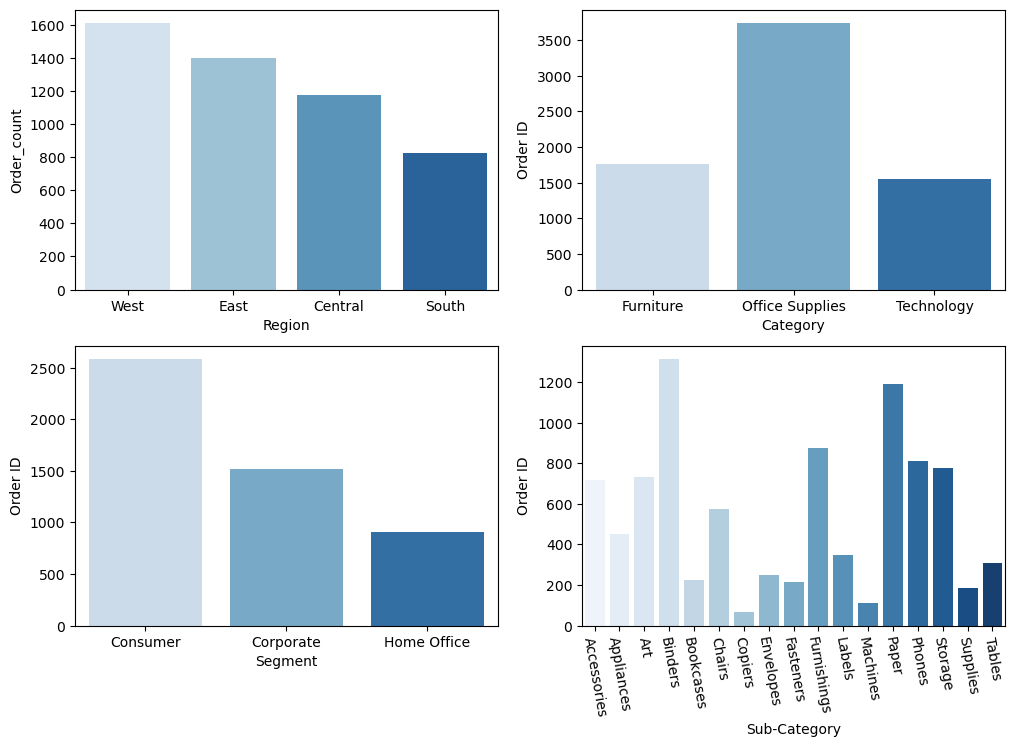

In [72]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.barplot(data=region_wise_orders,x='Region',y='Order_count',hue="Region",palette="Blues") # Region wise Orders

plt.subplot(2,2,2)
sns.barplot(data=pd.DataFrame(orders.groupby(by=['Category'])['Order ID'].nunique().reset_index()),x='Category',y='Order ID',hue="Category",palette="Blues") # Category wise orders

plt.subplot(2,2,3)
sns.barplot(data=pd.DataFrame(orders.groupby(['Segment'])['Order ID'].nunique().reset_index()),x="Segment",y="Order ID",hue="Segment",palette="Blues") # Orders based on Segment

plt.subplot(2,2,4)
# orders.groupby(['Sub-Category'])['Order ID'].nunique().plot(kind="bar",hue="Sub-Category",palette="viridis") # Order based on Sub-catgory
sns.barplot(data=pd.DataFrame(orders.groupby(['Sub-Category'])['Order ID'].nunique().reset_index()),x="Sub-Category",y="Order ID",hue="Sub-Category",palette="Blues") # Orders based on Segment
x,y =plt.xticks(rotation = 280)

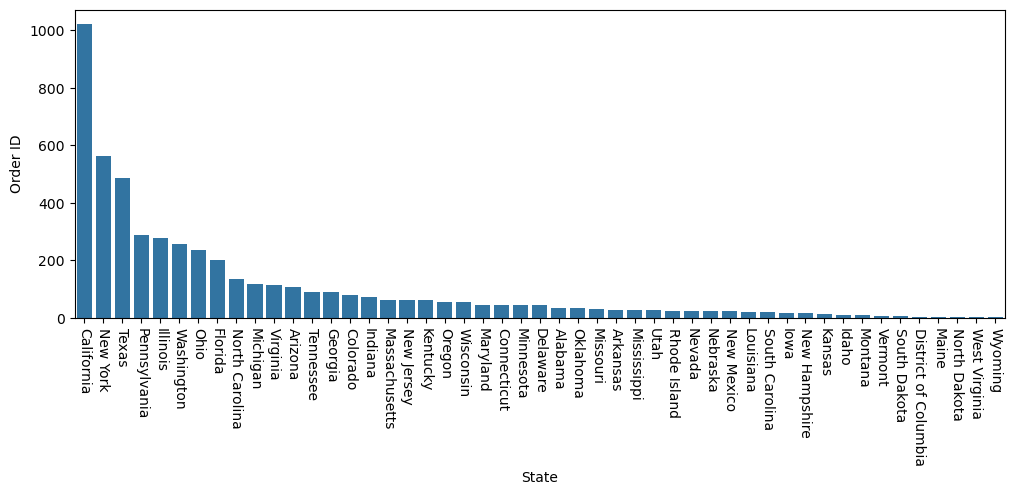

In [73]:
plt.figure(figsize=(12,4))

# Orders based on States
tab = orders.groupby(['State'])['Order ID'].nunique().reset_index().sort_values(by='Order ID',ascending = False)
sns.barplot(data=tab,x='State',y='Order ID')
x,y = plt.xticks(rotation = 270)

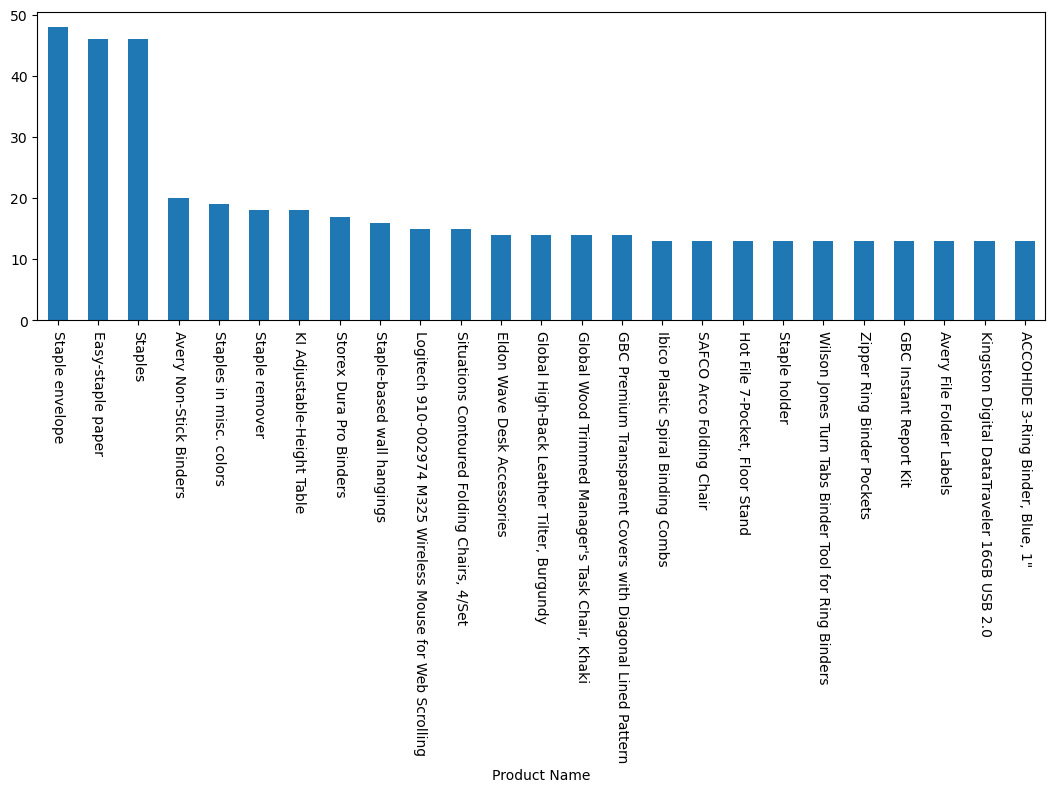

In [74]:
plt.figure(figsize=(13,4))

# Products orders 
orders['Product Name'].value_counts().head(25).plot(kind='bar')
x,y = plt.xticks(rotation = 270)

In [26]:
orders[['Order ID','Sales']]

,Order ID,Sales
7980,CA-2014-103800,16.448
739,CA-2014-112326,11.784
740,CA-2014-112326,272.736
741,CA-2014-112326,3.540
1759,CA-2014-141817,19.536
...,...,...
5091,CA-2017-156720,3.024
908,CA-2017-143259,52.776
907,CA-2017-143259,90.930
1296,CA-2017-115427,13.904


In [76]:
# Basket value
orders_detail = orders[['Order ID','Discount','Profit','Sales']].groupby(['Order ID']).agg(Product_count=('Order ID','count'),Total_Sales=('Sales','sum'),Total_Profit=('Profit','sum'),Total_Discount=('Discount','sum')).reset_index()

In [77]:
orders_detail

,Order ID,Product_count,Total_Sales,Total_Profit,Total_Discount
0,CA-2014-100006,1,377.970,109.6113,0.0
1,CA-2014-100090,2,699.192,-19.0890,0.4
2,CA-2014-100293,1,91.056,31.8696,0.2
3,CA-2014-100328,1,3.928,1.3257,0.2
4,CA-2014-100363,2,21.376,7.7192,0.4
...,...,...,...,...,...
5004,US-2017-168802,1,18.368,5.9696,0.2
5005,US-2017-169320,2,171.430,16.6721,0.0
5006,US-2017-169488,2,56.860,26.5552,0.0
5007,US-2017-169502,2,113.410,32.4527,0.0


In [163]:
orders_detail.groupby(by='Product_count').agg(orders=('Total_Sales','count'),Sales=('Total_Sales','sum'),Avg_Sales=('Total_Sales','mean'),Profit=('Total_Profit','sum'),Avg_profit=('Total_Profit','mean'),Discount=('Total_Discount','sum'),Avg_discount=('Total_Discount','mean')).reset_index().round(2)

,Product_count,orders,Sales,Avg_Sales,Profit,Avg_profit,Discount,Avg_discount
0,1,2538,528495.40,208.23,63335.50,24.95,397.90,0.16
1,2,1220,540894.96,443.36,64834.23,53.14,382.49,0.31
2,3,603,458647.30,760.61,64817.07,107.49,295.79,0.49
3,4,336,311516.29,927.13,50092.60,149.09,192.10,0.57
4,5,158,211251.91,1337.04,30295.39,191.74,128.79,0.82
5,6,70,73715.02,1053.07,4328.05,61.83,63.30,0.90
6,7,51,107810.23,2113.93,340.29,6.67,63.32,1.24
7,8,16,20289.30,1268.08,2467.20,154.20,19.70,1.23
8,9,10,17512.65,1751.27,1016.33,101.63,14.10,1.41
9,10,3,13438.57,4479.52,2039.66,679.89,1.10,0.37


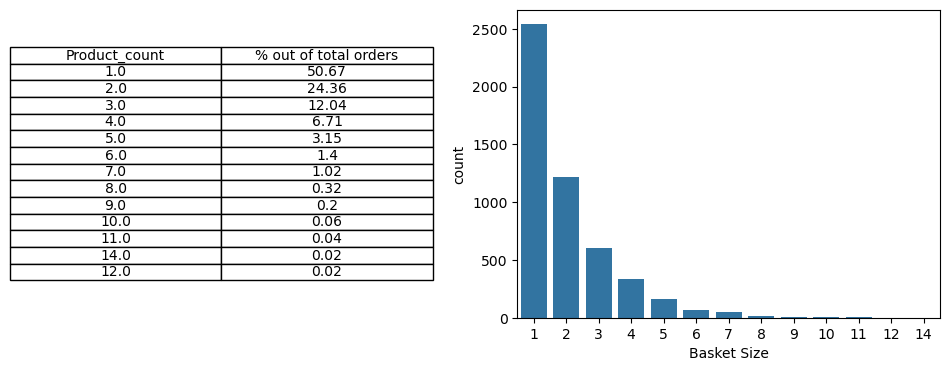

In [161]:
Basket_size = round(orders_detail['Product_count'].value_counts()/len(orders_detail)*100,2).reset_index()
Basket_size.columns = ['Product_count','% out of total orders']

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].axis('off')
ax[0].table(cellText=Basket_size.values,colLabels=Basket_size.columns,cellLoc='center',loc='center')

sns.countplot(data=orders_detail,x='Product_count')
x = plt.xlabel("Basket Size")

**Basket Value** - How much does customers spend in one single order.
**Average Basket size** - Average number of items per order.

In [31]:
orders_detail.describe()

,Product_count,Total_Sales,Total_Profit,Total_Discount
count,5009.000000,5009.000000,5009.000000,5009.000000
mean,1.995209,458.614666,57.176487,0.311657
std,1.410671,954.730953,344.937752,0.464326
min,1.000000,0.556000,-6892.374800,0.000000
25%,1.000000,37.630000,2.052500,0.000000
50%,1.000000,151.960000,16.275800,0.200000
75%,2.000000,512.064000,68.686800,0.400000
max,14.000000,23661.228000,8762.389100,4.000000


Count of Category ordered in a single order
- We can say orders with more than 1 category count as cross sell order.

In [147]:
order_cat = orders.groupby(by='Order ID').agg(Category_count=('Category','nunique'),Sub_category_count=('Sub-Category','nunique')).reset_index()
order_cat

round(order_cat['Category_count'].value_counts()/len(order_cat)*100,2).reset_index()
round(order_cat['Sub_category_count'].value_counts()/len(order_cat)*100,2).reset_index()


,Sub_category_count,count
0,1,53.16
1,2,25.67
2,3,12.06
3,4,5.47
4,5,2.10
5,6,1.12
6,7,0.32
7,8,0.06
8,9,0.02
9,10,0.02


## Returned orders detail

1. Basic detail of returned orders
2. Category, Products & region with most returns.
3. How is shipping time affect orders (return or successfully shipped)
4. How discount rate affects orders return.

In [35]:
returned_orders = orders.merge(Return,how="right",on='Order ID')

In [36]:
returned_orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'delivery time', 'Month', 'Day', 'Year', 'Week', 'Quarter', 'Price',
       'Customer_type', 'Returned'],
      dtype='object')

In [37]:
returned_orders['Order ID'].nunique()/orders['Order ID'].nunique()*100

5.909363146336594

### Product return %

In [38]:
product_return_count = pd.DataFrame(returned_orders['Product Name'].value_counts()).reset_index()
product_return_count.columns = ['Product Name','return_count']
return_to_order = product_return_count.merge(product_orders,how='left',on='Product Name')
return_to_order['Product_return_%'] = round((return_to_order['return_count']/return_to_order['Order_count'])*100)
return_to_order.sort_values(by='Product_return_%',ascending=False)

,Product Name,return_count,Order_count,Product_return_%
611,Canon Color ImageCLASS MF8580Cdw Wireless Lase...,1,1,100.0
186,Cisco SPA 501G IP Phone,1,1,100.0
232,Okidata B401 Printer,1,1,100.0
27,Avery 500,2,2,100.0
243,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",1,1,100.0
...,...,...,...,...
432,GBC Standard Therm-A-Bind Covers,1,12,8.0
0,Staple envelope,4,48,8.0
630,"Global High-Back Leather Tilter, Burgundy",1,14,7.0
117,Staples,2,46,4.0


### Region-wise Orders return %

In [39]:
region_wise_returned_orders = returned_orders[['Region','Order ID']].drop_duplicates()
region_wise_returned_orders = pd.DataFrame(region_wise_returned_orders['Region'].value_counts()).reset_index()

In [40]:
region_wise_returned_orders_per = region_wise_returned_orders.merge(region_wise_orders,how="left",on="Region")
region_wise_returned_orders_per['order_return_%'] = round(100*region_wise_returned_orders_per['count']/region_wise_returned_orders_per['Order_count'],2)
region_wise_returned_orders_per.sort_values(by='order_return_%',ascending=False)

,Region,count,Order_count,order_return_%
0,West,189,1611,11.73
2,Central,39,1175,3.32
1,East,44,1401,3.14
3,South,24,822,2.92


### Unique order & Order return % function 

In [41]:
def Unique_order(items,parameter,table):
    return pd.DataFrame(pd.DataFrame(table[[items,parameter]].drop_duplicates())[items].value_counts()).reset_index()

In [42]:
def Order_return_percent(item,par,return_table,order_table):
    return_orders = Unique_order(items=item,parameter=par,table=return_table)
    orders_count = Unique_order(items=item,parameter=par,table=order_table)x
    orders_count.columns = [item,"Order_count"]
    # Join tables on
    final = return_orders.merge(orders_count,how='left',on=item)
    final['Order_return_%'] = round(100*final['count']/final['Order_count'],2)
    return final.sort_values(by='Order_return_%',ascending=False)

### Ship mode wise Orders return %

In [43]:
Order_return_percent(item='Ship Mode',par='Order ID',return_table=returned_orders,order_table=orders)

,Ship Mode,count,Order_count,Order_return_%
3,Same Day,19,264,7.20
2,First Class,54,787,6.86
1,Second Class,55,964,5.71
0,Standard Class,168,2994,5.61


### Segment-wise Orders return %

In [44]:
Order_return_percent(item='Segment',par='Order ID',return_table=returned_orders,order_table=orders)

,Segment,count,Order_count,Order_return_%
1,Corporate,93,1514,6.14
0,Consumer,154,2586,5.96
2,Home Office,49,909,5.39


### State-wise Orders return %

In [45]:
Order_return_percent(item='State',par='Order ID',return_table=returned_orders,order_table=orders).head(20)

,State,count,Order_count,Order_return_%
15,Utah,4,26,15.38
31,Montana,1,8,12.50
7,Oregon,7,56,12.50
0,California,127,1021,12.44
6,Colorado,9,79,11.39
1,Washington,29,256,11.33
14,Delaware,4,44,9.09
33,Idaho,1,11,9.09
23,New Mexico,2,22,9.09
4,Arizona,9,108,8.33


### City-wise Orders return %

In [46]:
Order_return_percent(item='City',par='Order ID',return_table=returned_orders,order_table=orders).head(15)

,City,count,Order_count,Order_return_%
59,Temecula,1,1,100.0
37,Redwood City,1,1,100.0
70,La Quinta,1,1,100.0
68,Greeley,1,1,100.0
51,San Luis Obispo,1,1,100.0
46,Lake Elsinore,1,1,100.0
72,Bozeman,1,1,100.0
113,Bartlett,1,1,100.0
17,Costa Mesa,3,5,60.0
78,Parker,1,2,50.0


### Category-wise Orders return %

In [47]:
Order_return_percent(item='Category',par='Order ID',return_table=returned_orders,order_table=orders).head(15)

,Category,count,Order_count,Order_return_%
2,Technology,123,1544,7.97
1,Furniture,136,1764,7.71
0,Office Supplies,234,3742,6.25


### Sub-Category-wise Orders return %

In [48]:
Order_return_percent(item='Sub-Category',par='Order ID',return_table=returned_orders,order_table=orders)

,Sub-Category,count,Order_count,Order_return_%
14,Machines,13,112,11.61
9,Tables,30,307,9.77
8,Appliances,40,451,8.87
11,Fasteners,19,215,8.84
2,Phones,71,814,8.72
12,Supplies,16,187,8.56
1,Paper,99,1191,8.31
0,Binders,108,1316,8.21
6,Chairs,47,576,8.16
3,Furnishings,67,877,7.64


In [49]:
Order_return_percent(item='Customer Name',par='Order ID',return_table=returned_orders,order_table=orders).head(20)

,Customer Name,count,Order_count,Order_return_%
33,Hilary Holden,2,2,100.00
128,Roland Murray,1,1,100.00
1,Deanra Eno,3,5,60.00
146,Greg Hansen,1,2,50.00
22,Magdelene Morse,2,4,50.00
18,Andy Yotov,2,4,50.00
140,Mitch Willingham,1,2,50.00
224,Steven Ward,1,2,50.00
13,Michelle Tran,2,4,50.00
30,Mike Kennedy,2,4,50.00


In [50]:
Unique_order(items='Customer Name',parameter='Order ID',table=orders)

,Customer Name,count
0,Emily Phan,17
1,Sally Hughsby,13
2,Zuschuss Carroll,13
3,Chloris Kastensmidt,13
4,Erin Ashbrook,13
...,...,...
788,Susan MacKendrick,1
789,Jenna Caffey,1
790,Theresa Coyne,1
791,Patricia Hirasaki,1


In [51]:
Order_return_percent(item='delivery time',par='Order ID',return_table=returned_orders,order_table=orders)

,delivery time,count,Order_count,Order_return_%
6,0 days,19,252,7.54
3,3 days,37,509,7.27
5,7 days,20,308,6.49
7,1 days,11,182,6.04
2,2 days,40,675,5.93
4,6 days,35,596,5.87
0,4 days,78,1403,5.56
1,5 days,56,1084,5.17


In [52]:
Order_return_percent(item='Day',par='Order ID',return_table=returned_orders,order_table=orders)

,Day,count,Order_count,Order_return_%
4,Thursday,47,746,6.30
6,Wednesday,11,182,6.04
0,Friday,55,916,6.00
2,Sunday,50,850,5.88
3,Saturday,49,837,5.85
1,Monday,53,920,5.76
5,Tuesday,31,558,5.56


In [53]:
Order_return_percent(item='Month',par='Order ID',return_table=returned_orders,order_table=orders)

,Month,count,Order_count,Order_return_%
10,January,13,178,7.30
4,August,24,341,7.04
0,December,49,702,6.98
3,October,29,417,6.95
5,March,22,354,6.21
6,April,21,343,6.12
11,February,9,162,5.56
1,November,41,753,5.44
8,July,18,338,5.33
2,September,36,688,5.23


In [54]:
return_orders_detail = returned_orders[['Order ID','Discount','Profit','Sales']].groupby(['Order ID']).agg(Product_count=('Order ID','count'),Total_Sales=('Sales','sum'),Total_Profit=('Profit','sum'),Total_Discount=('Discount','sum')).reset_index()

In [55]:
shipped_order = orders.merge(Return,how='left',on='Order ID')
shipped_order = shipped_order[shipped_order['Returned'].isna()]
shipped_orders_detail = shipped_order[['Order ID','Discount','Profit','Sales']].groupby(['Order ID']).agg(Product_count=('Order ID','count'),Total_Sales=('Sales','sum'),Total_Profit=('Profit','sum'),Total_Discount=('Discount','sum')).reset_index()

In [56]:
return_orders_detail.describe()

,Product_count,Total_Sales,Total_Profit,Total_Discount
count,296.000000,296.000000,296.000000,296.000000
mean,2.702703,609.811750,78.487708,0.387635
std,1.899008,1126.648747,506.392170,0.604204
min,1.000000,2.224000,-3791.163400,0.000000
25%,1.000000,92.510000,6.739200,0.000000
50%,2.000000,261.755000,31.314700,0.200000
75%,3.000000,704.738500,96.176225,0.400000
max,14.000000,14052.480000,6734.472000,4.000000


In [57]:
orders_detail.describe()

,Product_count,Total_Sales,Total_Profit,Total_Discount
count,5009.000000,5009.000000,5009.000000,5009.000000
mean,1.995209,458.614666,57.176487,0.311657
std,1.410671,954.730953,344.937752,0.464326
min,1.000000,0.556000,-6892.374800,0.000000
25%,1.000000,37.630000,2.052500,0.000000
50%,1.000000,151.960000,16.275800,0.200000
75%,2.000000,512.064000,68.686800,0.400000
max,14.000000,23661.228000,8762.389100,4.000000


In [58]:
shipped_orders_detail.describe()

,Product_count,Total_Sales,Total_Profit,Total_Discount
count,4713.000000,4713.000000,4713.000000,4713.000000
mean,1.950774,449.118732,55.838035,0.306885
std,1.362281,942.218804,332.222381,0.453763
min,1.000000,0.556000,-6892.374800,0.000000
25%,1.000000,35.910000,1.973000,0.000000
50%,1.000000,146.040000,15.552000,0.200000
75%,2.000000,496.634000,66.235700,0.400000
max,12.000000,23661.228000,8762.389100,3.700000
